In [2]:
from skimage import img_as_uint, img_as_ubyte, img_as_bool, img_as_float
from skimage.io import imread, imshow, imsave, find_available_plugins
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity
from skimage.viewer import ImageViewer
from skimage.filters import try_all_threshold,gabor, threshold_otsu, threshold_mean, threshold_minimum, \
threshold_local, frangi, gaussian 
from skimage.morphology import skeletonize, skeletonize_3d, thin, disk
from skimage.util import invert
from skimage.feature import canny, orb
from skimage.filters.rank import enhance_contrast, autolevel
from skimage.segmentation import felzenszwalb
from PIL import Image, ImageDraw
import shutil 

import os
import numpy as np
#sns.set(style='whitegrid')
import json

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = {'png', 'retina'}

/usr/local/lib/python2.7/site-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


In [3]:
%matplotlib inline

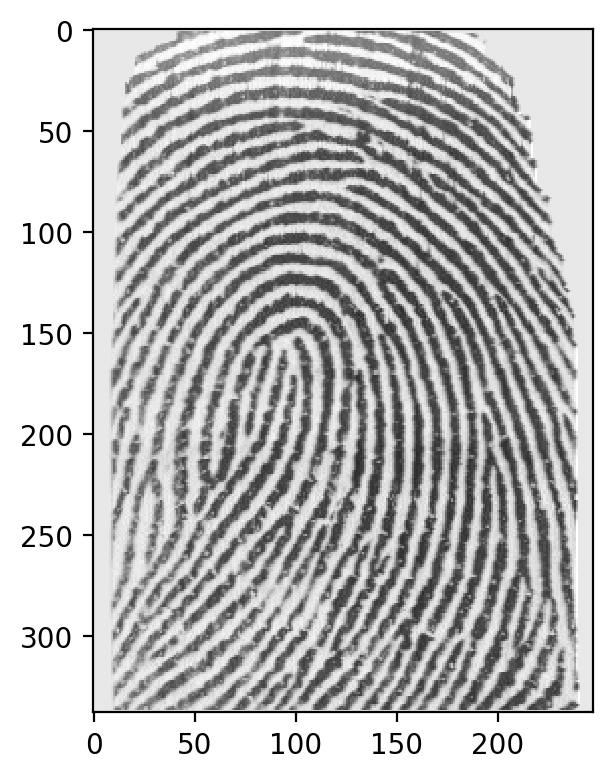

In [4]:
img = imread("data/raw_data/png/1_1.png", as_grey = True)
imshow(img)

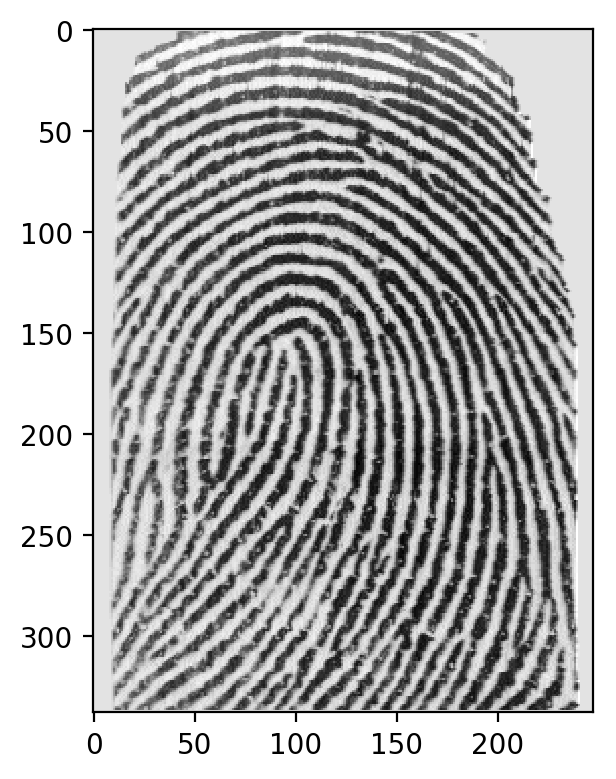

In [5]:
img_intensity_scale = rescale_intensity(img)

imshow(img_intensity_scale)

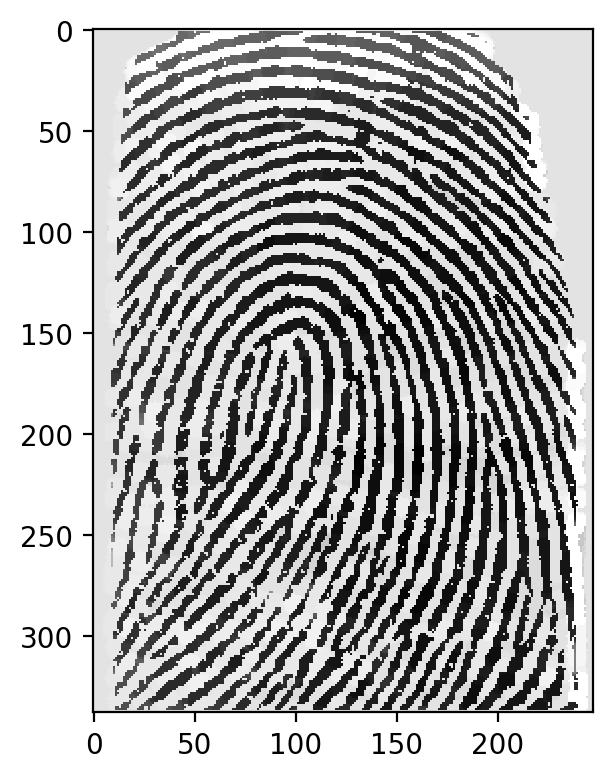

In [6]:
img_enhanced_contrast = enhance_contrast(img_intensity_scale, disk(5))

imshow(img_enhanced_contrast)

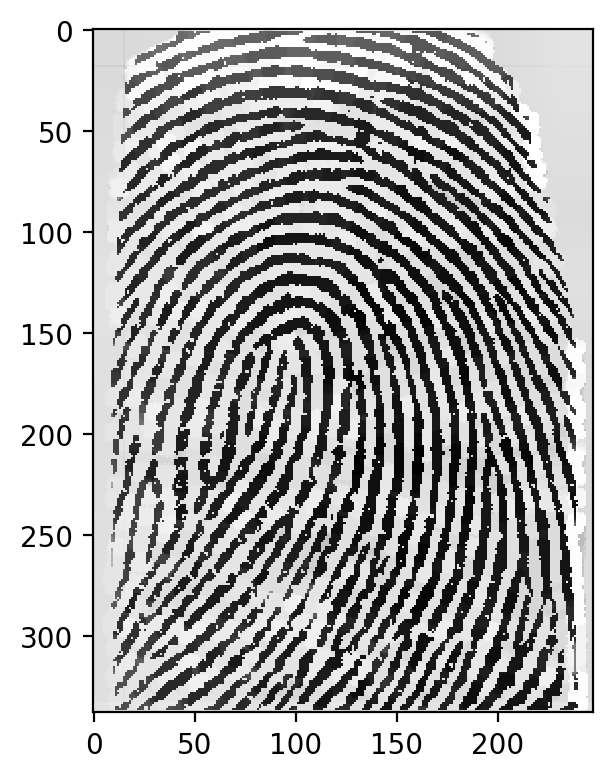

In [7]:
img_equalized = equalize_adapthist(img_enhanced_contrast)
imshow(img_equalized)

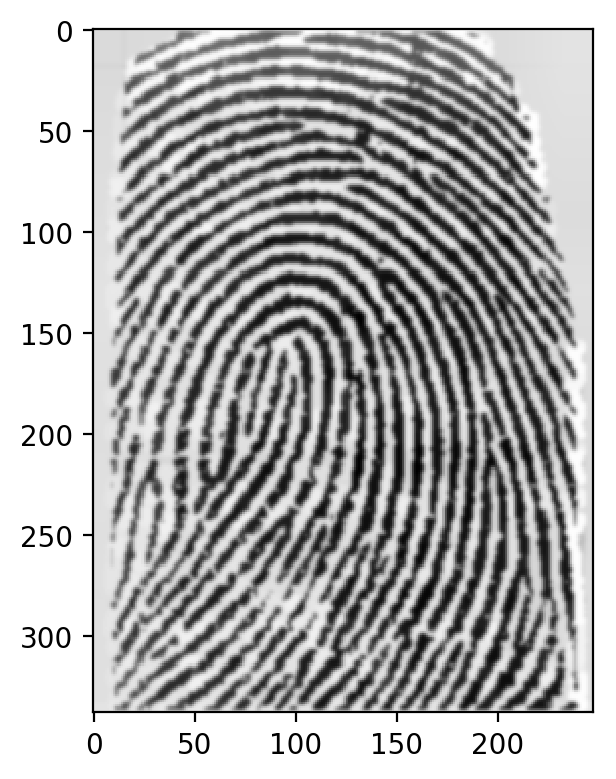

In [8]:
img_smoothed = gaussian(img_equalized)

imshow(img_smoothed)

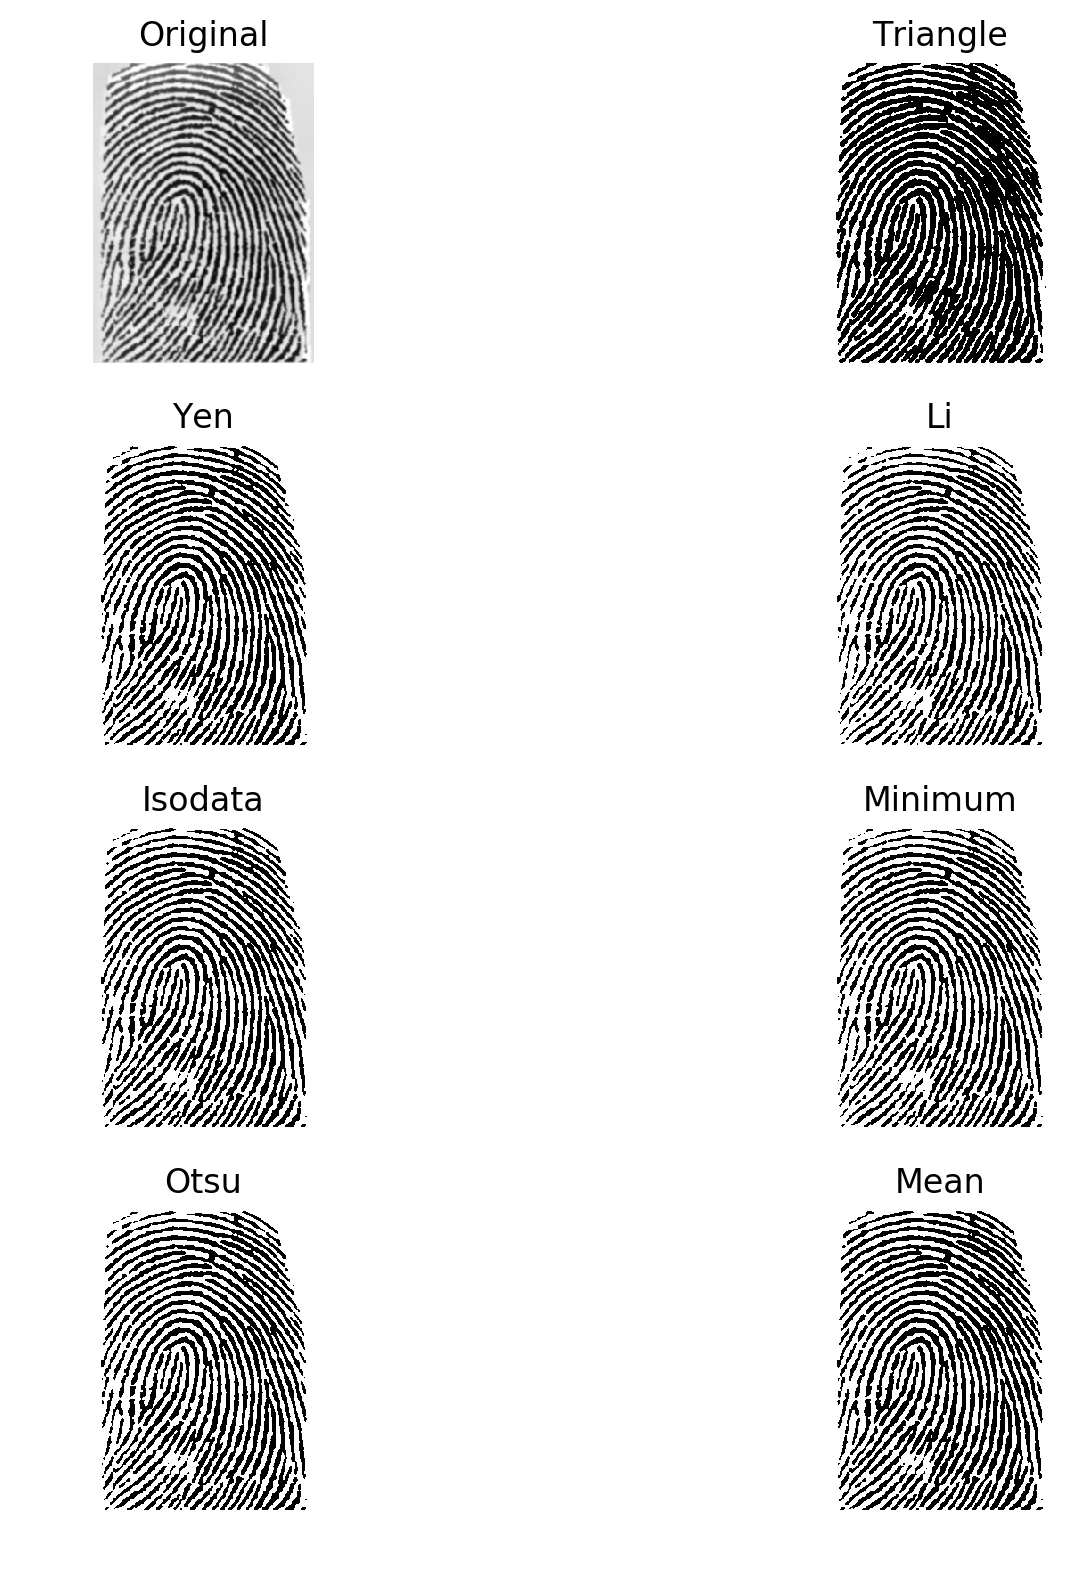

In [9]:
fig, ax = try_all_threshold(img_smoothed, figsize=(10, 8), verbose=False)
plt.show()

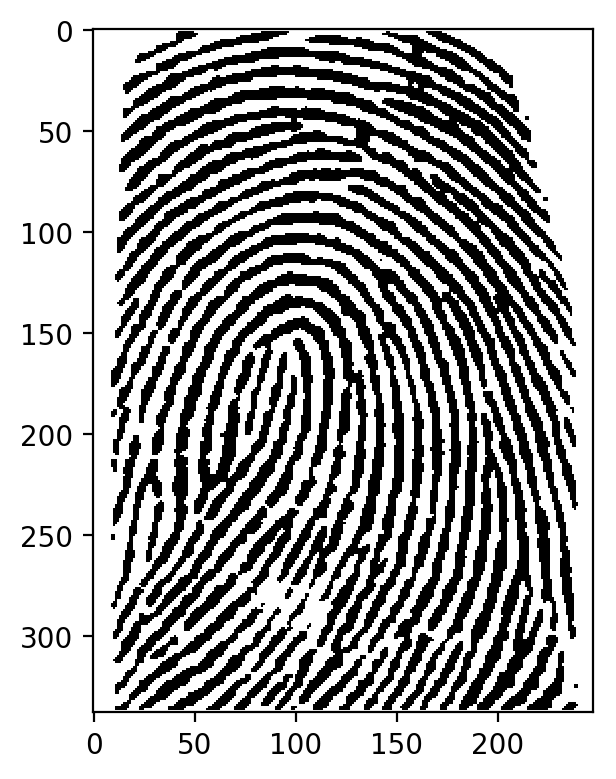

In [10]:
thresh_local = threshold_local(img_smoothed, 125, 'mean')
img_binarized = img_smoothed > thresh_local

imshow(img_binarized)

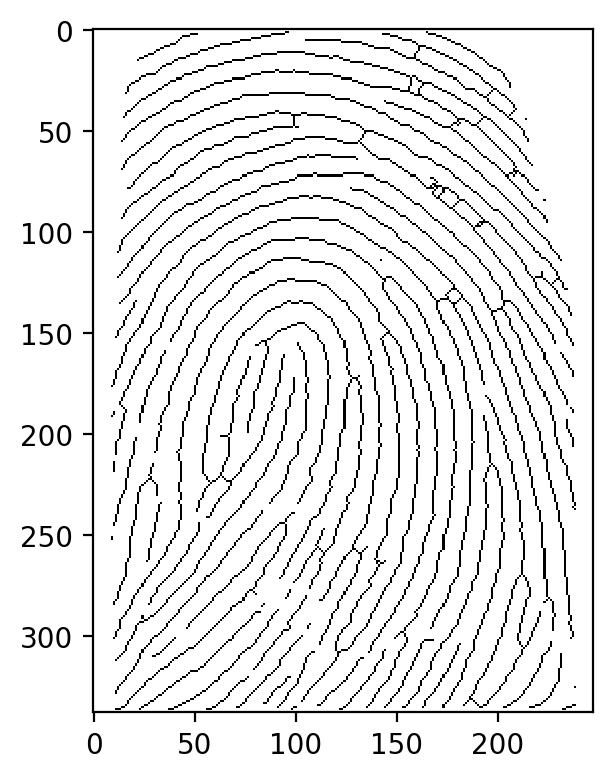

In [11]:
img_thinned = invert(thin(invert(img_binarized)))

imshow(img_thinned)


In [12]:
im = imread("data/raw_data/png/1_1.png")
im

array([[232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       ..., 
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232]], dtype=uint8)

In [13]:
img_thinned

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [14]:
im1 = Image.fromarray(np.array(img_as_ubyte(img_thinned)))

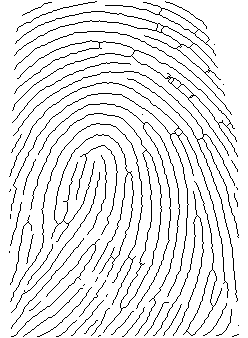

In [15]:
im1.convert('RGB')

In [16]:
json_data = open("1_1_preprocessed_extracted.json").read()
data = json.loads(json_data)
data["core point"]

[88, 136]

In [17]:
data.keys()

[u'core point', u'bifurcation', u'ending']

In [18]:
sum([len(data[key]) for key in data.keys()])


222

In [19]:
len(data["bifurcation"])+len(data["ending"])

220

In [24]:
flatten_template_features = data[data.keys()[1]] + data[data.keys()[2]]
s = len(flatten_template_features)
flatten_features_zipped = zip(flatten_template_features[0:s],flatten_template_features[0:s])
flatten_features_zipped[0][0]

[8, 161]